# Introduction to Machine Learning

By the end of this week, students will:

Understand what machine learning (ML) is and where it’s used.

Learn the difference between supervised and unsupervised learning.

Use scikit-learn to run a simple prediction model.

Interpret ML results in plain language.

# What is Machine Learning?

#  How ML Works (Simplified)

#  Types of ML

# Simple Prediction with scikit-learn

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Data
df = pd.DataFrame({
    "Size": [1500, 1800, 2400],
    "Bedrooms": [3, 4, 4],
    "Price": [200000, 250000, 300000]
})

# Train
X = df[["Size", "Bedrooms"]]
y = df["Price"]

model = LinearRegression()
model.fit(X, y)

# Predict
new_house = [[2000, 3]]
print(model.predict(new_house))

[241666.66666667]


C:\Users\Woon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


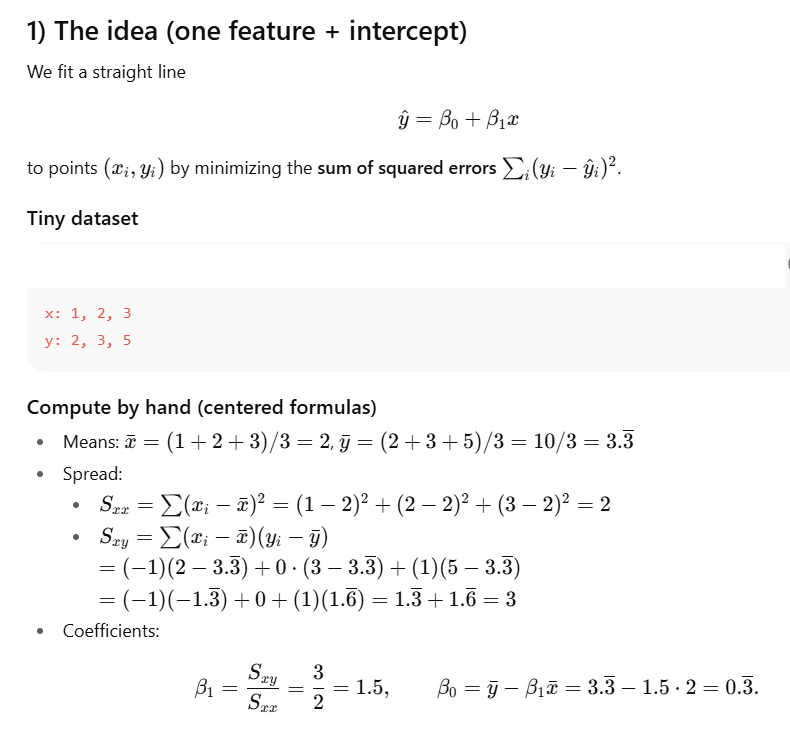

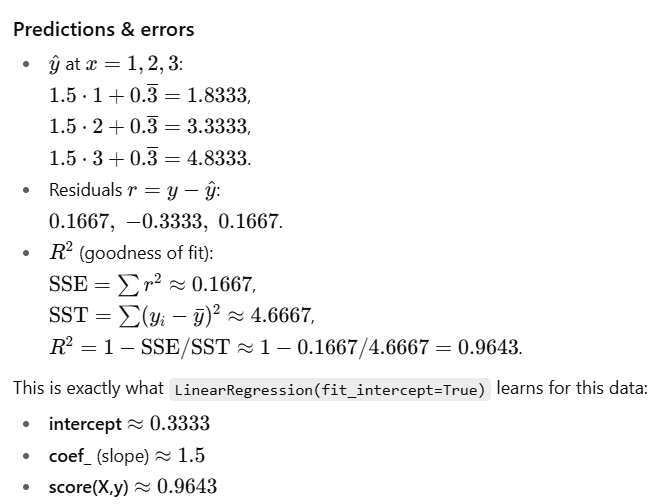

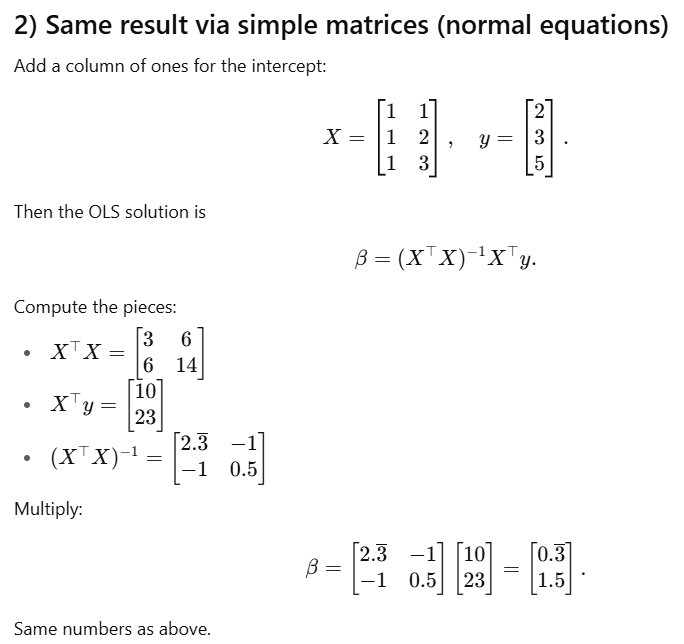

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1.0],[2.0],[3.0]])
y = np.array([2.0, 3.0, 5.0])

# With intercept (recommended)
m = LinearRegression(fit_intercept=True)
m.fit(X, y)
print("coef_ (slope):", m.coef_[0])        # ~ 1.5
print("intercept_   :", m.intercept_)       # ~ 0.3333
print("R^2          :", m.score(X, y))      # ~ 0.9643

# Without intercept (not recommended here)
m0 = LinearRegression(fit_intercept=False)
m0.fit(X, y)
print("coef_ (slope, no intercept):", m0.coef_[0])   # ~ 1.6429
print("R^2 (no intercept)         :", m0.score(X,y)) # ~ 0.9541


coef_ (slope): 1.4999999999999998
intercept_   : 0.3333333333333339
R^2          : 0.9642857142857143
coef_ (slope, no intercept): 1.6428571428571423
R^2 (no intercept)         : 0.9540816326530612


# Classification Example (Iris Dataset)

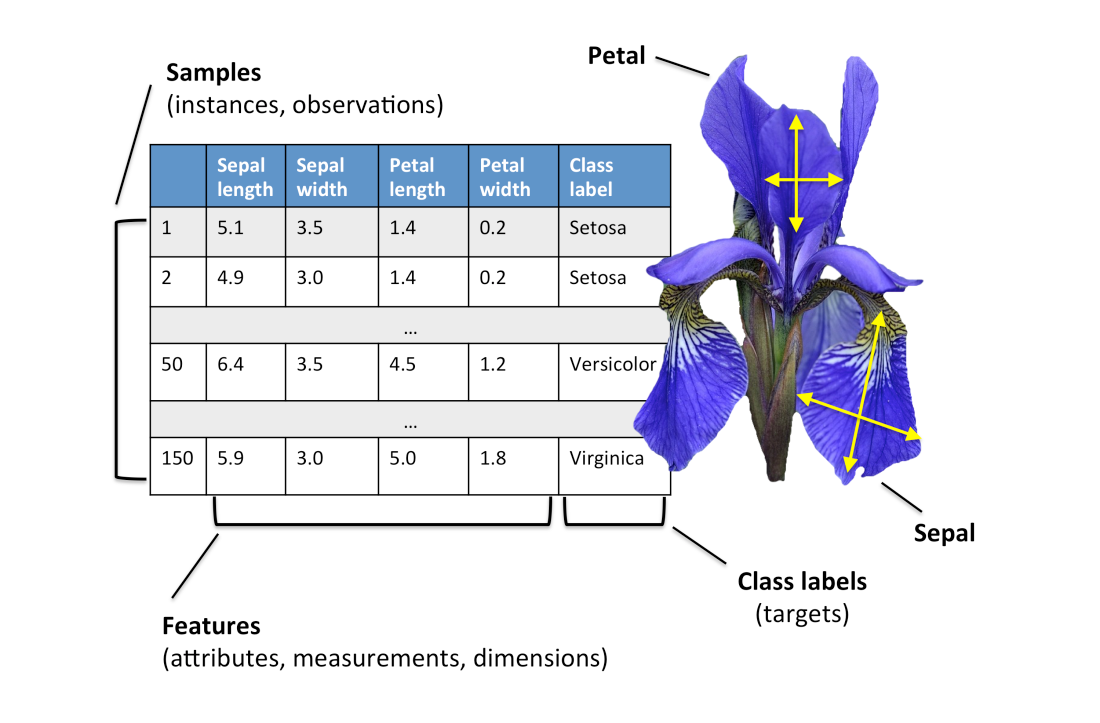

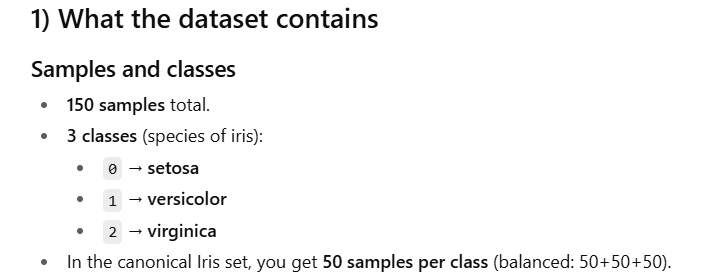

In [1]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
y = iris.target
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))  # {0: 50, 1: 50, 2: 50}


{0: 50, 1: 50, 2: 50}


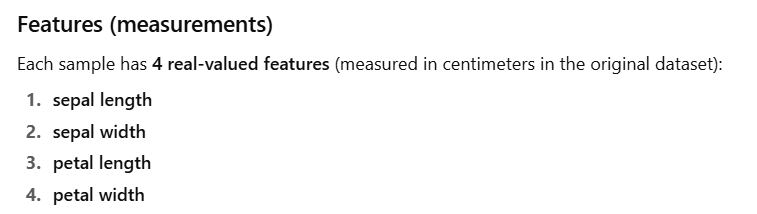

In [2]:
iris = load_iris()
print(iris.feature_names)
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


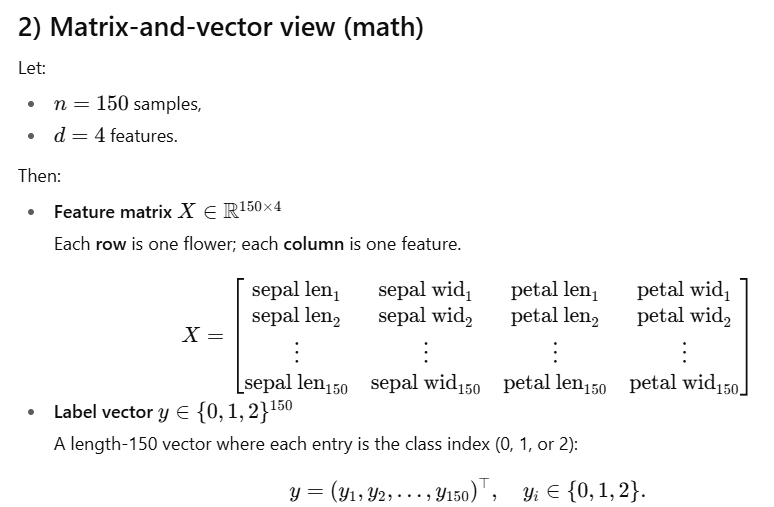

In [3]:
iris = load_iris()
X = iris.data      # shape (150, 4), dtype float
y = iris.target    # shape (150,), dtype int
print(X.shape, y.shape)  # (150, 4) (150,)

(150, 4) (150,)


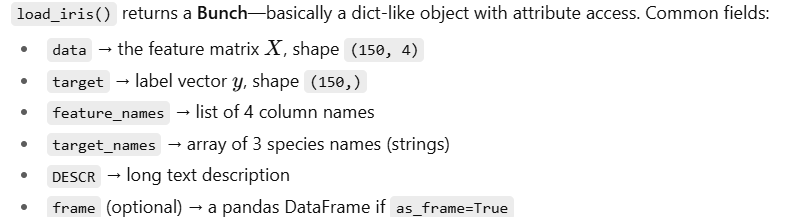

In [4]:
iris = load_iris()
print(type(iris))                  # <class 'sklearn.utils._bunch.Bunch'>
print(iris.keys())                 # dict-like keys
print(iris.target_names)           # ['setosa' 'versicolor' 'virginica']
print(iris.feature_names)          # feature names as above


<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris_df = load_iris(as_frame=True)
df = iris_df.frame  # includes both features and target as columns
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


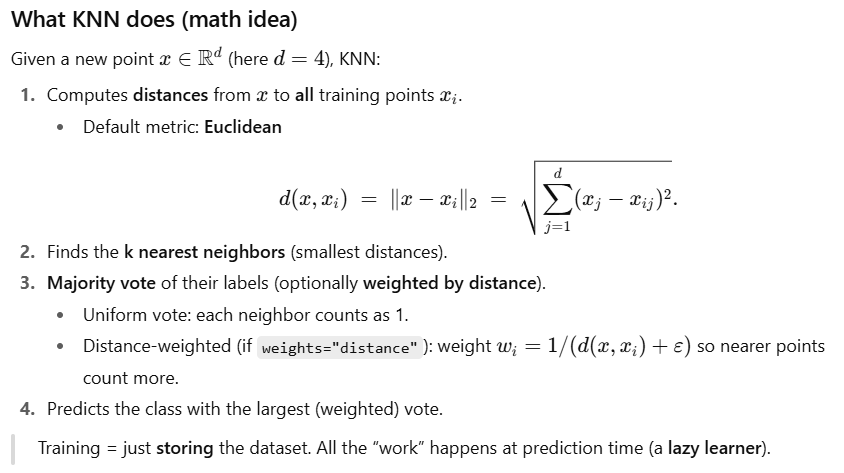

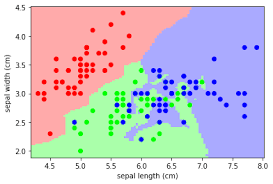

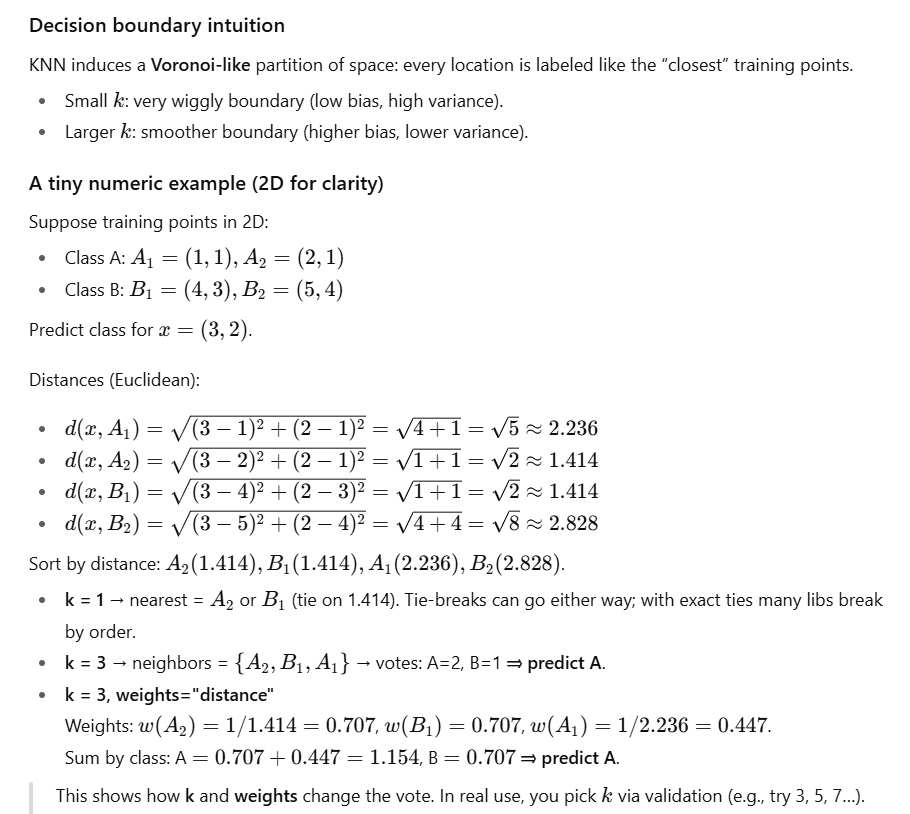

In [11]:
# Inline KNN decision boundary animation (no file saved).
# This cell displays the animation directly using HTML (JS-based) so you can watch it inline.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 1) Create a simple 2D, binary classification dataset
X, y = make_blobs(n_samples=200, centers=2, random_state=4, cluster_std=[1.2, 1.2])

# 2) Prepare a grid to evaluate decision function
x_min, x_max = X[:, 0].min() - 2.0, X[:, 0].max() + 2.0
y_min, y_max = X[:, 1].min() - 2.0, X[:, 1].max() + 2.0
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
grid = np.c_[xx.ravel(), yy.ravel()]

# 3) Range of k values to animate (odd numbers to reduce ties)
k_values = list(range(1, 26, 2))  # 1, 3, 5, ..., 25

# 4) Model factory
def make_model(k):
    return make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))

# 5) Set up the figure
fig, ax = plt.subplots(figsize=(6, 6))
title_text = ax.set_title("")
scatter_obj = ax.scatter(X[:, 0], X[:, 1], c=y, s=30)  # colormap is auto-chosen
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

# Placeholder for contour
contourf_obj = [None]

def update(frame_idx):
    k = k_values[frame_idx]
    model = make_model(k)
    model.fit(X, y)
    Z = model.predict(grid).reshape(xx.shape)

    # Remove previous contour
    if contourf_obj[0] is not None:
        for c in contourf_obj[0].collections:
            c.remove()

    # Draw decision regions (no explicit colors specified)
    cf = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.unique(Z).size)
    contourf_obj[0] = cf

    title_text.set_text(f"KNN Decision Boundary — k = {k}")
    return contourf_obj + [scatter_obj, title_text]

anim = FuncAnimation(fig, update, frames=len(k_values), interval=800, blit=False, repeat=True)

# Display inline via JSHTML
html_anim = anim.to_jshtml()
plt.close(fig)
display(HTML(html_anim))


C:\Users\Woon\AppData\Local\Temp\ipykernel_73296\3471320806.py:49: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in contourf_obj[0].collections:
C:\Users\Woon\AppData\Local\Temp\ipykernel_73296\3471320806.py:49: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in contourf_obj[0].collections:
C:\Users\Woon\AppData\Local\Temp\ipykernel_73296\3471320806.py:49: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in contourf_obj[0].collections:
C:\Users\Woon\AppData\Local\Temp\ipykernel_73296\3471320806.py:49: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in contourf_obj[0].collections:
C:\Users\Woon\AppData\Local\Temp\ipykernel_73296\3471320806.py:49: MatplotlibDeprecationWarning: The

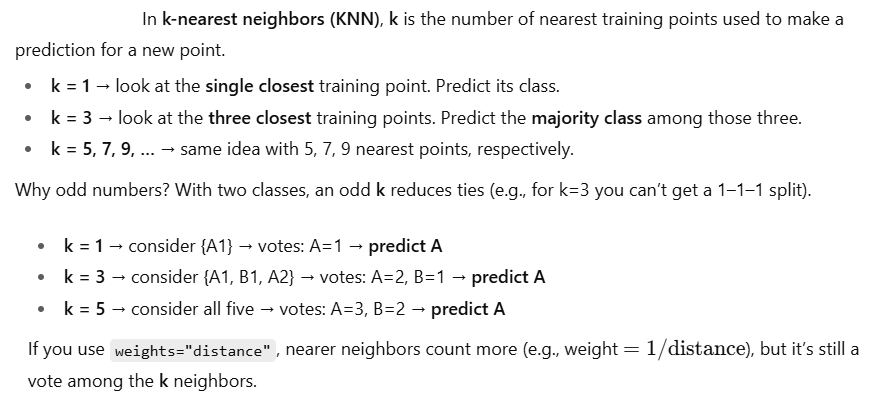

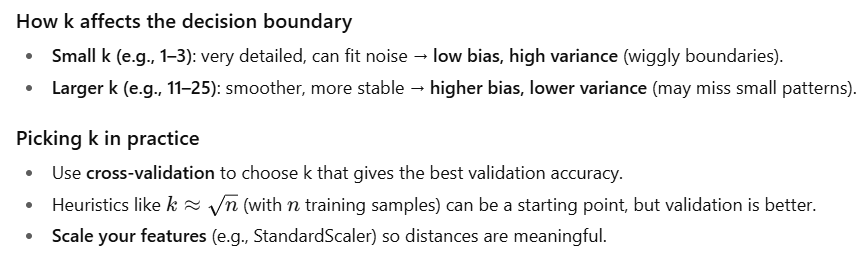

In [12]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

print(model.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


# Evaluating Accuracy

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9666666666666667


## Cross Validation to find best k

In [14]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# 1) Data
iris = load_iris()
X, y = iris.data, iris.target

# 2) Cross-validate k (try odd k to reduce ties)
k_grid = list(range(1, 26, 2))  # 1,3,5,...,25
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

mean_scores = []
for k in k_grid:
    pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    scores = cross_val_score(pipe, X, y, cv=cv, scoring="accuracy")
    mean_scores.append(scores.mean())

best_idx = int(np.argmax(mean_scores))
best_k = k_grid[best_idx]
best_cv_acc = mean_scores[best_idx]

print(f"Best k: {best_k}")
print(f"CV accuracy (mean over folds): {best_cv_acc:.4f}")

# 3) Refit the final model on the full data using the best k
final_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=best_k))
final_model.fit(X, y)

# 4) Predict your sample
sample = [[5.1, 3.5, 1.4, 0.2]]
pred = final_model.predict(sample)[0]
print("Predicted class index:", pred)
print("Predicted class name :", iris.target_names[pred])


Best k: 5
CV accuracy (mean over folds): 0.9733
Predicted class index: 0
Predicted class name : setosa


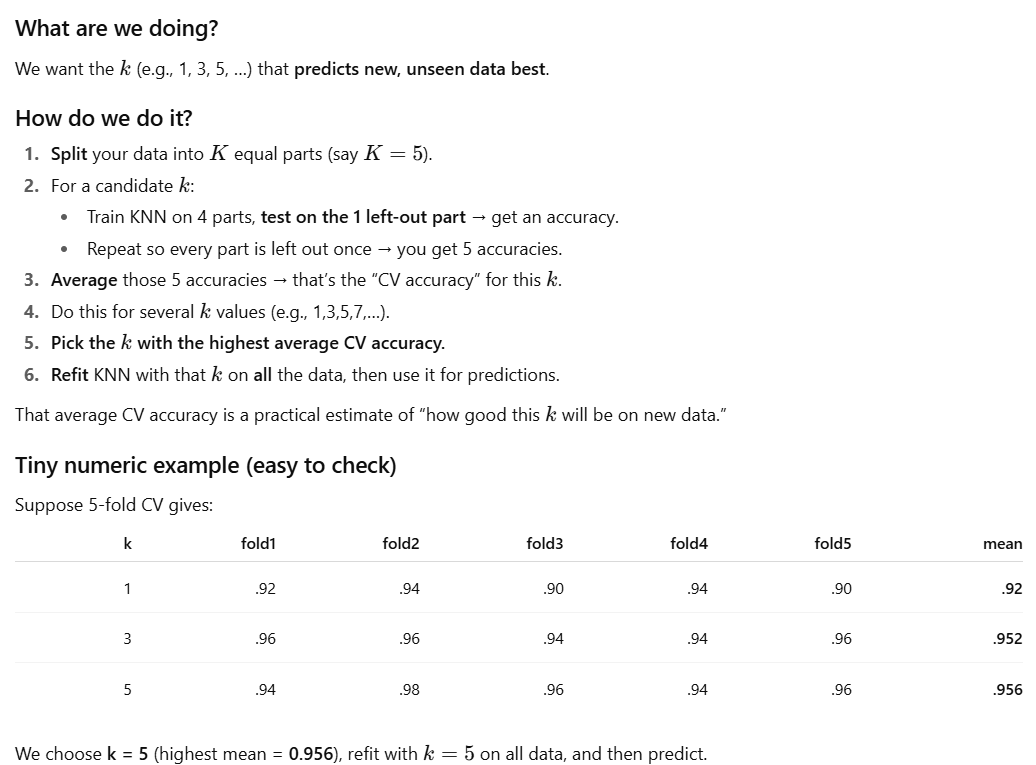

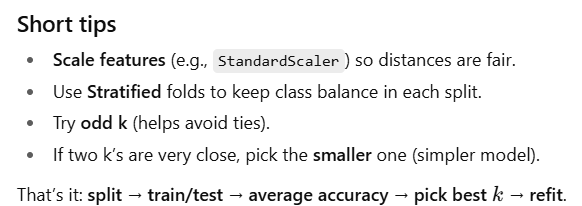

# In-Class Activity

# Common Mistakes

# Key Takeaways

# Homework